In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
# from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv('/content/Electric_Production.csv',parse_dates=['DATE'])
data.head()

,DATE,IPG2211A2N
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


In [ ]:
data.rename(columns={'DATE':'ds','IPG2211A2N':'y'},inplace = True)

In [ ]:
data.describe()

,ds,y
count,397,397.000000
mean,2001-07-01 13:25:14.357682560,88.847218
min,1985-01-01 00:00:00,55.315100
25%,1993-04-01 00:00:00,77.105200
50%,2001-07-01 00:00:00,89.779500
75%,2009-10-01 00:00:00,100.524400
max,2018-01-01 00:00:00,129.404800
std,NaN,15.387834


As the Mean and value at 50% percentile are nearly same, we can say that the data is normally distributed

<Axes: ylabel='Density'>

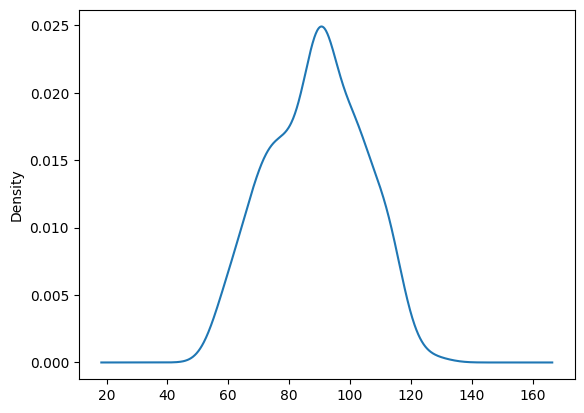

In [ ]:
data['y'].plot(kind = 'kde')

In [ ]:
!pip install prophet

In [ ]:
data.isnull().sum()

ds    0
y     0
dtype: int64

In [ ]:
data.shape

(397, 2)

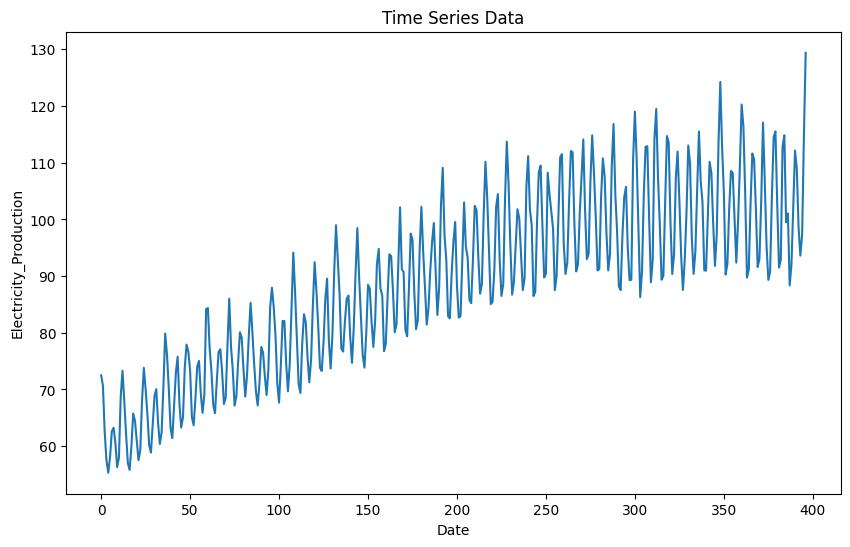

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['y'])
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Electricity_Production')
plt.show()

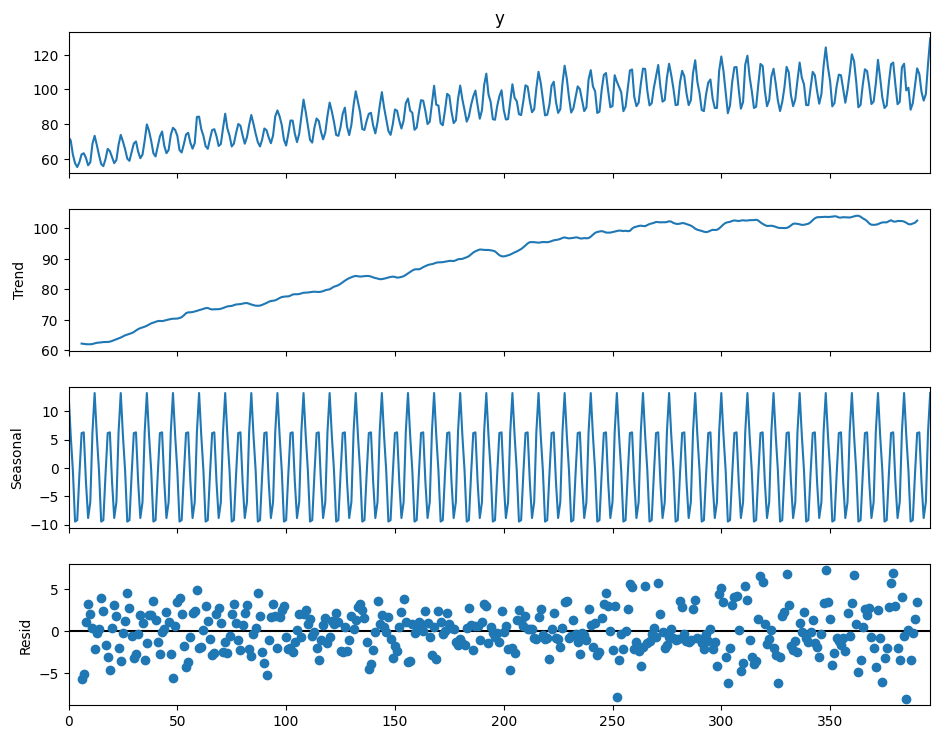

In [ ]:
decomposition = seasonal_decompose(data['y'], model='additive',period=12)
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()

# ADF - Test

In [ ]:
from statsmodels.tsa.stattools import adfuller
# Perform ADF test
result = adfuller(data['y'])

# Extract and display the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -2.256990350047235
p-value: 0.1862146911658712
Critical Values:
   1%: -3.4476305904172904
   5%: -2.869155980820355
   10%: -2.570827146203181


Data is Non-stationary

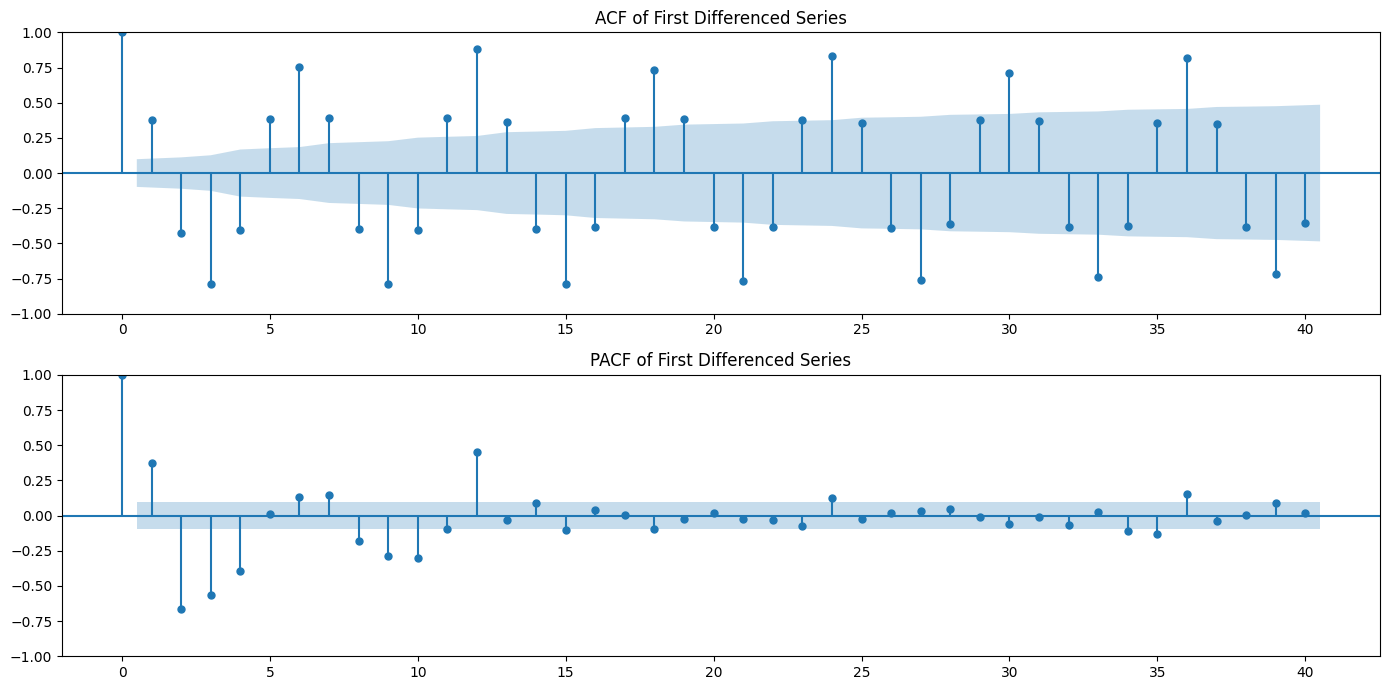

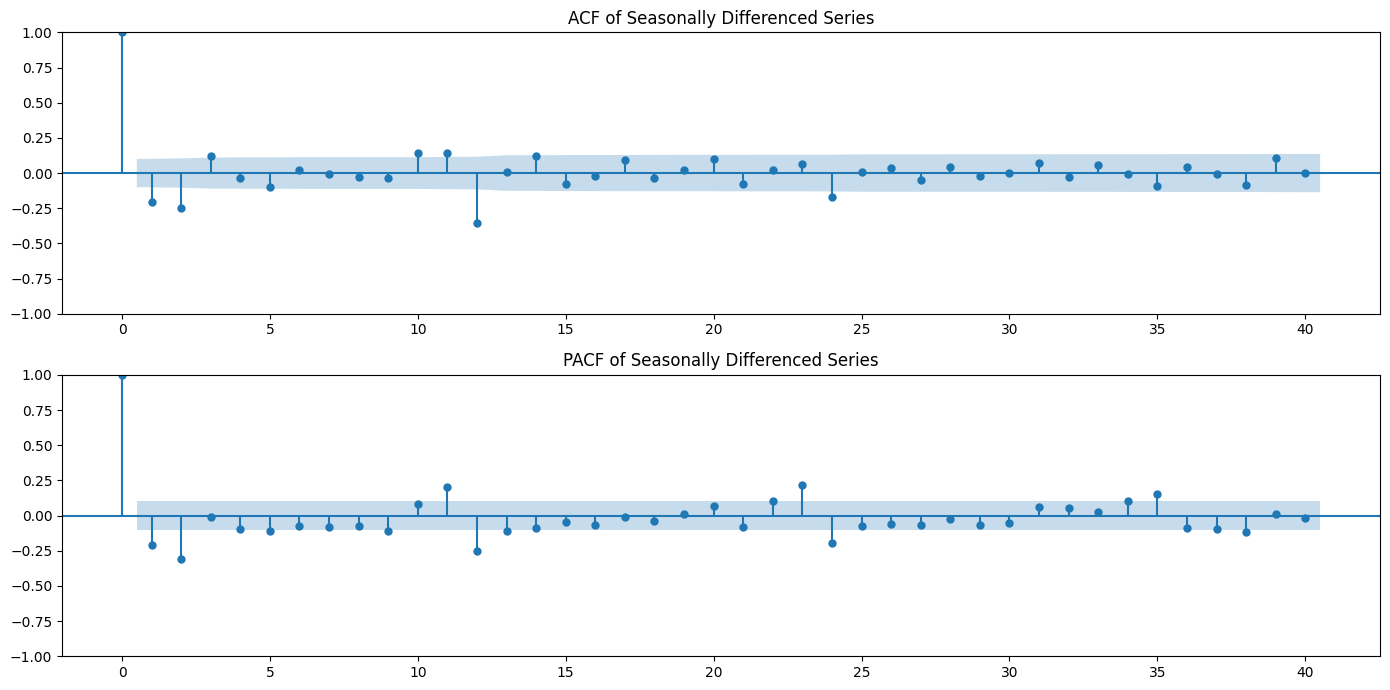

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Prepare the data for modeling
y = df['y']

# Apply first differencing to remove the trend
y_diff = y.diff().dropna()

# Apply seasonal differencing to remove seasonality
seasonal_period = 12
y_seasonal_diff = y_diff.diff(seasonal_period).dropna()

# Plot ACF and PACF for the first differenced series
plt.figure(figsize=(14, 7))
plt.subplot(211)
plot_acf(y_diff, ax=plt.gca(), lags=40)
plt.title('ACF of First Differenced Series')

plt.subplot(212)
plot_pacf(y_diff, ax=plt.gca(), lags=40)
plt.title('PACF of First Differenced Series')

plt.tight_layout()
plt.show()

# Plot ACF and PACF for the seasonally differenced series
plt.figure(figsize=(14, 7))
plt.subplot(211)
plot_acf(y_seasonal_diff, ax=plt.gca(), lags=40)
plt.title('ACF of Seasonally Differenced Series')

plt.subplot(212)
plot_pacf(y_seasonal_diff, ax=plt.gca(), lags=40)
plt.title('PACF of Seasonally Differenced Series')

plt.tight_layout()
plt.show()


In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima.arima.utils import ndiffs
ndiffs(data['y'],test='adf')

0

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0w3kdm83/pg7jq_xi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0w3kdm83/86qu5ahq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33152', 'data', 'file=/tmp/tmp0w3kdm83/pg7jq_xi.json', 'init=/tmp/tmp0w3kdm83/86qu5ahq.json', 'output', 'file=/tmp/tmp0w3kdm83/prophet_modelogxi6ul0/prophet_model-20240624085503.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:55:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


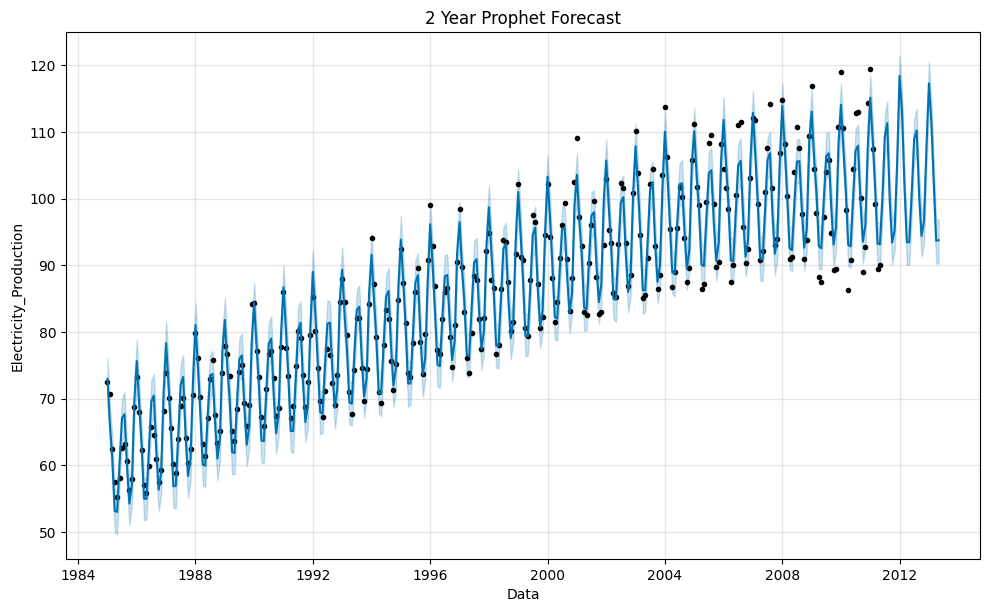

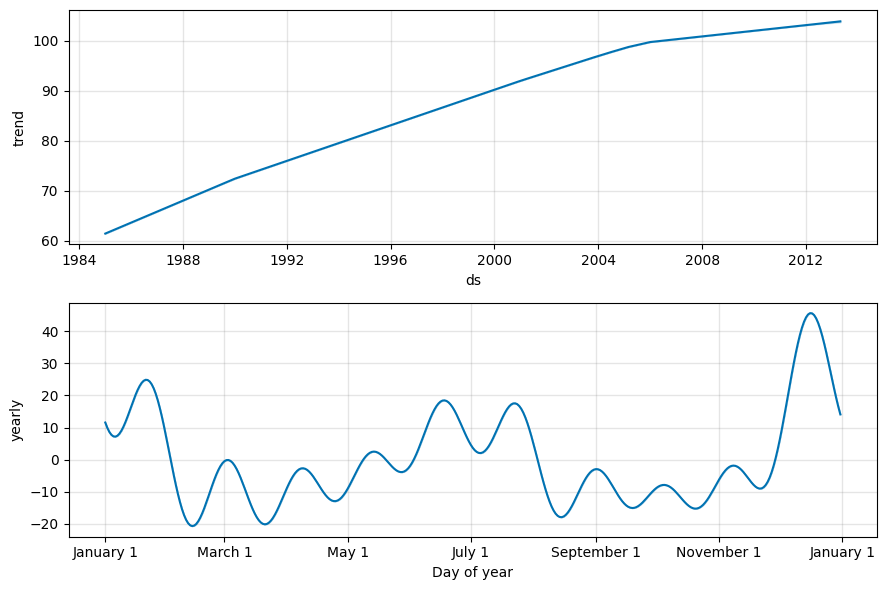

In [ ]:
from prophet import Prophet

train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:]
# Define and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(train)

# Create a DataFrame for future dates
# Create a dataframe for future dates (2 years ahead)
future = prophet_model.make_future_dataframe(periods=3, freq='M')
# future = prophet_model.make_future_dataframe(periods=365)
forecast_prophet = prophet_model.predict(future)

# Plot the forecast
fig = prophet_model.plot(forecast_prophet)
# plt.plot(test.index, test, label='Actual', color='red')
plt.xlabel('Data')
plt.ylabel('Electricity_Production')
# plt.legend(['Train', 'Forecast', 'Test'])
plt.title('2 Year Prophet Forecast')
plt.show()

#Plot the components
fig = prophet_model.plot_components(forecast_prophet)
plt.show()

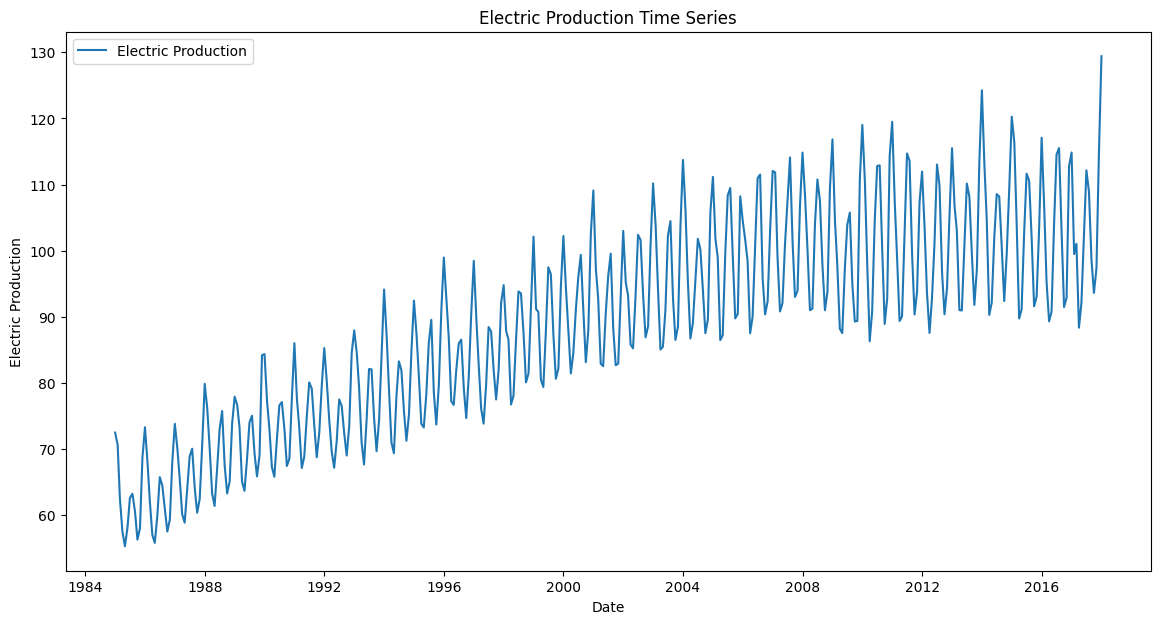

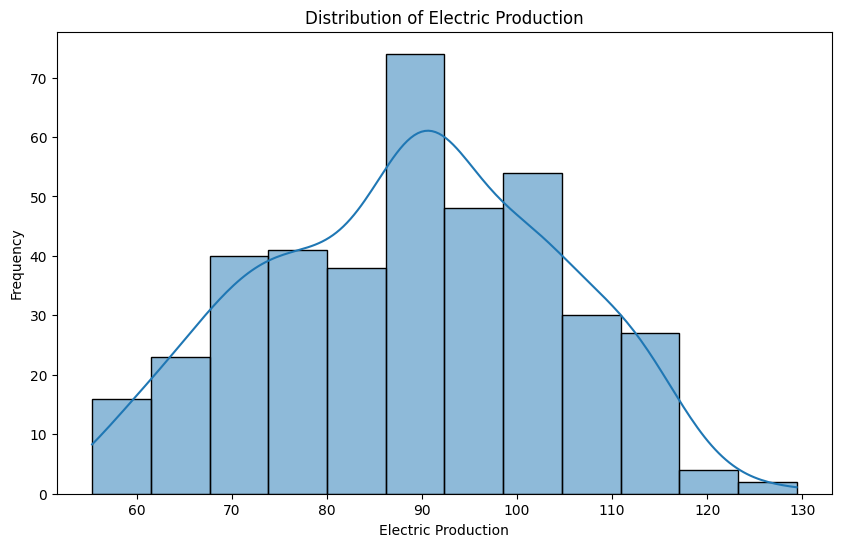

(-0.07281915414558082, -0.7005639504294972)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Convert the 'DATE' column to datetime format and set it as the index
df = data.copy()
df.set_index('ds', inplace=True)

# Plot the time series
plt.figure(figsize=(14, 7))
plt.plot(df, label='Electric Production')
plt.title('Electric Production Time Series')
plt.xlabel('Date')
plt.ylabel('Electric Production')
plt.legend()
plt.show()

# Check the distribution of the electric production values
plt.figure(figsize=(10, 6))
sns.histplot(df['y'], kde=True)
plt.title('Distribution of Electric Production')
plt.xlabel('Electric Production')
plt.ylabel('Frequency')
plt.show()

# Calculate skewness and kurtosis
electric_production_skewness = skew(df['y'])
electric_production_kurtosis = kurtosis(df['y'])

electric_production_skewness, electric_production_kurtosis

Number of differences needed: 0
Test Statistic           -2.256990
p-value                   0.186215
# Lags Used              15.000000
# Observations Used     381.000000
Critical Value (1%)      -3.447631
Critical Value (5%)      -2.869156
Critical Value (10%)     -2.570827
dtype: float64
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1953.976, Time=4.96 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2750.050, Time=0.09 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=1.65 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2401.309, Time=2.02 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2748.185, Time=0.17 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=7.38 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=7.76 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=1955.618, Time=18.04 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=17.85 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=2.13 sec
 ARIMA(2,1,2)(0,0,

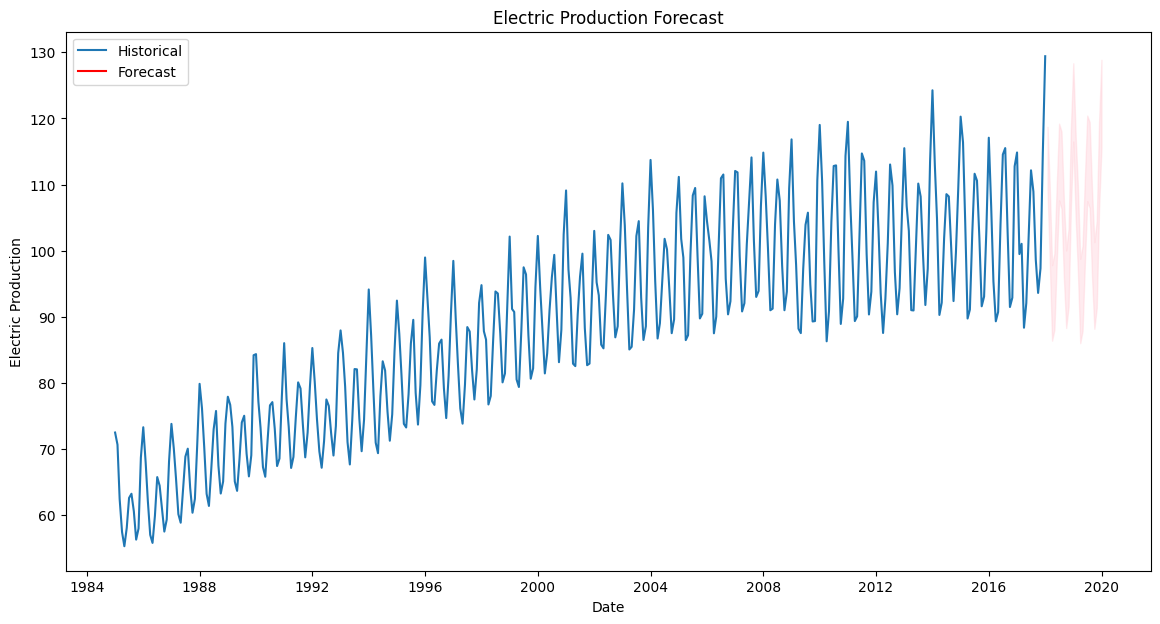

In [ ]:
import pmdarima as pm

# Prepare the data for modeling
y = df['y']

# Determine the number of differences needed to make the time series stationary
from pmdarima.arima.utils import ndiffs
n_diffs = ndiffs(y, test='adf')
print(f'Number of differences needed: {n_diffs}')

# Difference the series if needed
if n_diffs > 0:
    y_diff = y.diff(n_diffs).dropna()
else:
    y_diff = y

# Check stationarity again
from statsmodels.tsa.stattools import adfuller
adf_test_diff = adfuller(y_diff)
adf_results_diff = pd.Series(adf_test_diff[0:4], index=['Test Statistic', 'p-value', '# Lags Used', '# Observations Used'])
for key, value in adf_test_diff[4].items():
    adf_results_diff[f'Critical Value ({key})'] = value
print(adf_results_diff)

# Fit the ARIMA model
model = pm.auto_arima(y_diff, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)

# Forecast the next 24 months (2 years)
forecast, conf_int = model.predict(n_periods=24, return_conf_int=True)

# Create a new DataFrame for the forecast
forecast_dates = pd.date_range(start=y.index[-1], periods=24, freq='M')
forecast_df = pd.DataFrame({'Forecast': forecast}, index=forecast_dates)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(y, label='Historical')
plt.plot(forecast_df, label='Forecast', color='red')
plt.fill_between(forecast_dates, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.title('Electric Production Forecast')
plt.xlabel('Date')
plt.ylabel('Electric Production')
plt.legend()
plt.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0w3kdm83/ne7q5amb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0w3kdm83/p_vqo_g6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46868', 'data', 'file=/tmp/tmp0w3kdm83/ne7q5amb.json', 'init=/tmp/tmp0w3kdm83/p_vqo_g6.json', 'output', 'file=/tmp/tmp0w3kdm83/prophet_model5rxy4cuy/prophet_model-20240624100218.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:02:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:02:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


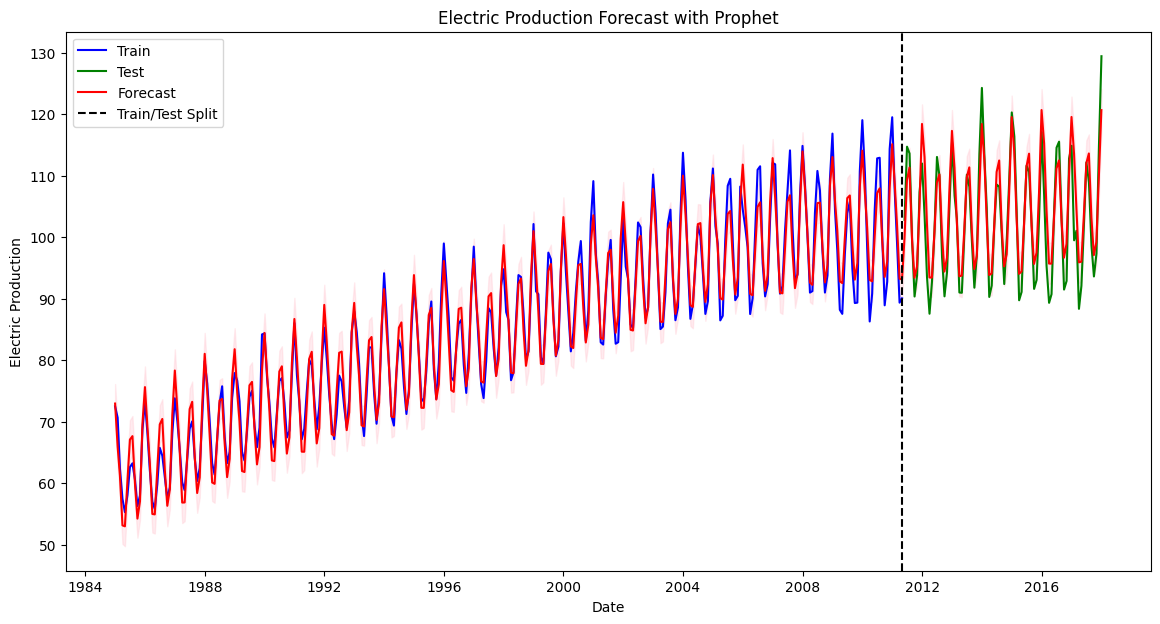

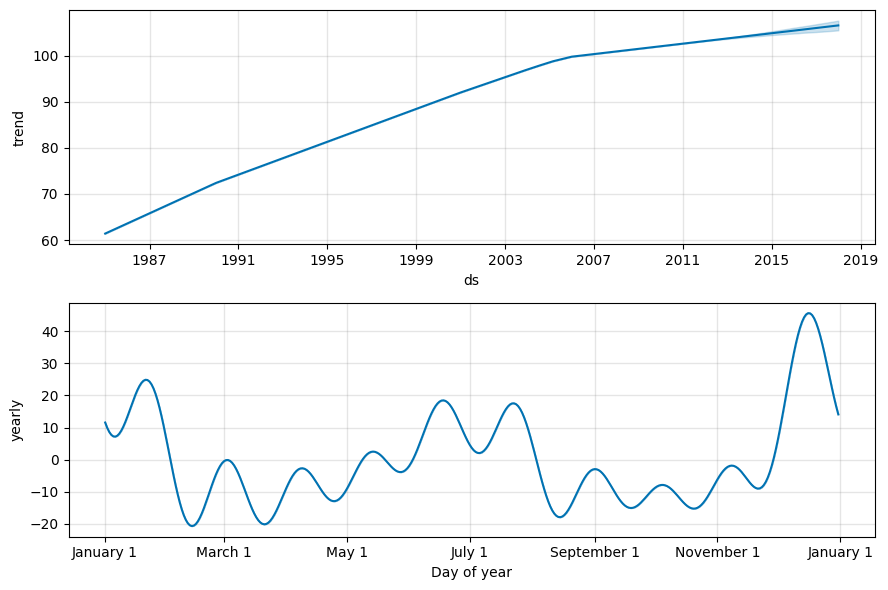

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
293,2009-06-01,101.701835,96.367353,102.911619,101.701835,101.701835,-1.912770,-1.912770,-1.912770,-1.912770,-1.912770,-1.912770,0.0,0.0,0.0,99.789065
294,2009-07-01,101.748253,103.083964,109.651496,101.748253,101.748253,4.599647,4.599647,4.599647,4.599647,4.599647,4.599647,0.0,0.0,0.0,106.347900
295,2009-08-01,101.796218,103.565555,110.223693,101.796218,101.796218,4.979179,4.979179,4.979179,4.979179,4.979179,4.979179,0.0,0.0,0.0,106.775398
296,2009-09-01,101.844183,95.732745,102.088928,101.844183,101.844183,-2.962701,-2.962701,-2.962701,-2.962701,-2.962701,-2.962701,0.0,0.0,0.0,98.881482
297,2009-10-01,101.890601,89.670682,96.327736,101.890601,101.890601,-8.795151,-8.795151,-8.795151,-8.795151,-8.795151,-8.795151,0.0,0.0,0.0,93.095450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,2017-08-31,106.363741,99.772471,106.623851,105.355545,107.325863,-3.121115,-3.121115,-3.121115,-3.121115,-3.121115,-3.121115,0.0,0.0,0.0,103.242626
393,2017-09-30,106.410159,93.817363,100.614163,105.384523,107.388366,-9.321984,-9.321984,-9.321984,-9.321984,-9.321984,-9.321984,0.0,0.0,0.0,97.088174
394,2017-10-31,106.458124,95.445155,102.707723,105.417503,107.454719,-7.267716,-7.267716,-7.267716,-7.267716,-7.267716,-7.267716,0.0,0.0,0.0,99.190408
395,2017-11-30,106.504542,106.189928,113.429470,105.450469,107.521229,3.237839,3.237839,3.237839,3.237839,3.237839,3.237839,0.0,0.0,0.0,109.742381


In [ ]:
# Initialize the Prophet model
model = Prophet()

# Fit the model on the training data
model.fit(train)

# Create a dataframe for future dates (including the test period and 2 years ahead)
future = model.make_future_dataframe(periods=len(test), freq='M')

# Make forecast
forecast = model.predict(future)

# Plot the results
plt.figure(figsize=(14, 7))

# Plot training data
plt.plot(train['ds'], train['y'], label='Train', color='blue')

# Plot test data
plt.plot(test['ds'], test['y'], label='Test', color='green')

# Plot forecasted values
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')

# Highlight the forecast period
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='pink', alpha=0.3)

# Mark the train/test split
plt.axvline(x=train['ds'].iloc[-1], color='black', linestyle='--', label='Train/Test Split')

# Add titles and labels
plt.title('Electric Production Forecast with Prophet')
plt.xlabel('Date')
plt.ylabel('Electric Production')
plt.legend()
plt.show()

# Plot the forecast components
fig2 = model.plot_components(forecast)
plt.show()

# Extract the forecast for the test period and the next 2 years
forecast.tail(len(test))


In [ ]:
# Calculate MSE
mse = mean_squared_error(test['y'], forecast['yhat'][len(train):])
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 18.225785251971544
